In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=165474f680ed2bbbb1ec8b42f04cc6aa984686caa10d62083859841c985d92be
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
pip install paho-mqtt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62118 sha256=fde0ed96be072c0b0020beb11d7f2fe8de1c638762482f402b0d61524750f0ab
  Stored in directory: /root/.cache/pip/wheels/8b/bb/0c/79444d1dee20324d442856979b5b519b48828b0bd3d05df84a
Successfully built paho-mqtt


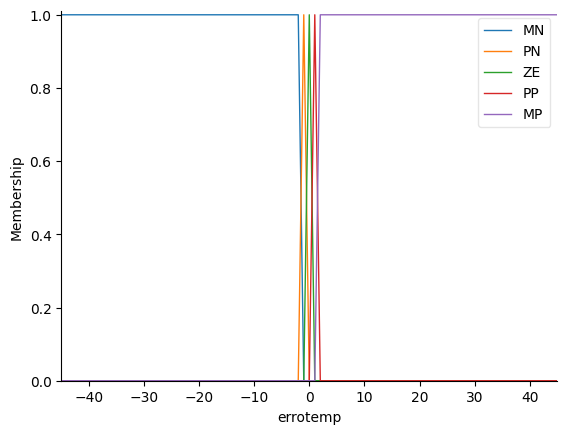

In [ ]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

mqttBroker ="test.mosquitto.org"
client = mqtt.Client("c213Inatelsbm")
client.connect(mqttBroker)

# New Antecedent/Consequent objects hold universe variables and membership
# functions
errotemp = ctrl.Antecedent(np.arange(-45, 46, 1), 'errotemp')
varerrotemp =ctrl.Antecedent(np.arange(-2, 2.01, 0.01), 'varerrotemp')
aquecedor =ctrl.Consequent(np.arange(0, 100, 1), 'aquecedor')


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-45, -45, -2,-1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-2,-1,0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-1, 0, 1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 1, 2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe,[1, 2, 45,45])
# You can see how these look with .view()
errotemp.view()

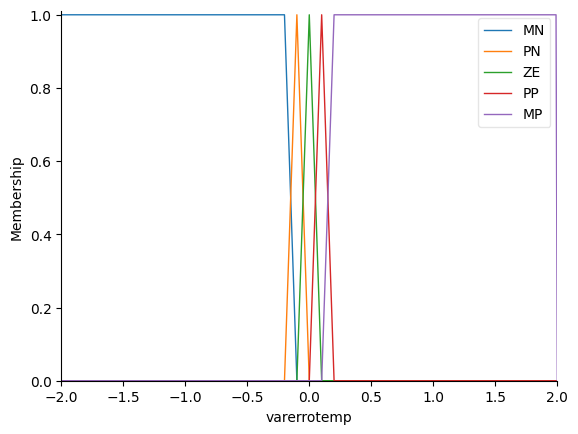

In [ ]:
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-2, -2, -0.2,-0.1])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 2,2])
# You can see how these look with .view()
varerrotemp.view()

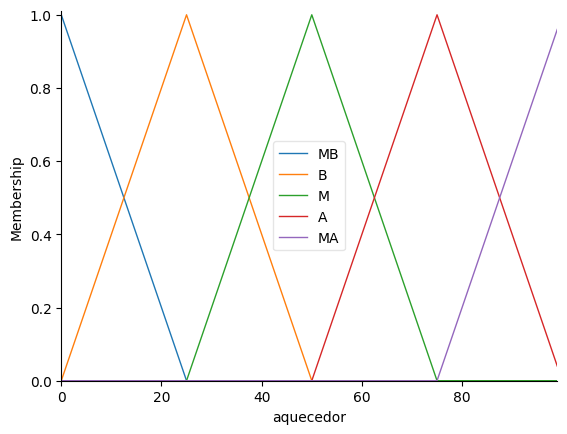

In [ ]:
aquecedor['MB'] = fuzz.trimf(aquecedor.universe, [0,0,25])
aquecedor['B'] = fuzz.trimf(aquecedor.universe, [0,25,50])
aquecedor['M'] = fuzz.trimf(aquecedor.universe, [25, 50, 75])
aquecedor['A'] = fuzz.trimf(aquecedor.universe, [50, 75, 100])
aquecedor['MA'] = fuzz.trimf(aquecedor.universe, [75, 100, 100])
aquecedor.view()

In [ ]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], aquecedor['M'])
regra2 = ctrl.Rule(errotemp['PN']& varerrotemp['MN'], aquecedor['M'])
regra3 = ctrl.Rule(errotemp['ZE']& varerrotemp['MN'], aquecedor['M'])
regra4 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], aquecedor['M'])
regra5 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], aquecedor['M'])
regra6 = ctrl.Rule(errotemp['MN']& varerrotemp['PN'], aquecedor['M'])
regra7 = ctrl.Rule(errotemp['PN']& varerrotemp['PN'], aquecedor['M'])
regra8 = ctrl.Rule(errotemp['ZE']& varerrotemp['PN'], aquecedor['M'])
regra9 = ctrl.Rule(errotemp['PP']& varerrotemp['PN'], aquecedor['M'])
regra10 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], aquecedor['M'])
regra11 = ctrl.Rule(errotemp['MN']& varerrotemp['ZE'], aquecedor['M'])
regra12 = ctrl.Rule(errotemp['PN']& varerrotemp['ZE'], aquecedor['M'])
regra13 = ctrl.Rule(errotemp['ZE']& varerrotemp['ZE'], aquecedor['M'])
regra14 = ctrl.Rule(errotemp['PP']& varerrotemp['ZE'], aquecedor['M'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], aquecedor['M'])
regra16 = ctrl.Rule(errotemp['MN']& varerrotemp['PP'], aquecedor['M'])
regra17 = ctrl.Rule(errotemp['PN']& varerrotemp['PP'], aquecedor['M'])
regra18 = ctrl.Rule(errotemp['ZE']& varerrotemp['PP'], aquecedor['M'])
regra19 = ctrl.Rule(errotemp['PP']& varerrotemp['PP'], aquecedor['M'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], aquecedor['M'])
regra21 = ctrl.Rule(errotemp['MN']& varerrotemp['MP'], aquecedor['M'])
regra22 = ctrl.Rule(errotemp['PN']& varerrotemp['MP'], aquecedor['M'])
regra23 = ctrl.Rule(errotemp['ZE']& varerrotemp['MP'], aquecedor['M'])
regra24 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], aquecedor['M'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['MP'], aquecedor['M'])

In [ ]:
aquecedor_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
potencia = ctrl.ControlSystemSimulation(aquecedor_ctrl)

In [ ]:
sp=30
tempatual=32
print(tempatual)
erroatual=0
while True: 
  erroanterior=erroatual
  erroatual=tempatual-sp
  varerroTemp=erroatual-erroanterior
  potencia.input['errotemp'] =erroatual
  potencia.input['varerrotemp'] =varerroTemp
  potencia.compute()
  i=0
  while (i < 10):
    tempatual=tempatual * 0.9954 + potencia.output['aquecedor'] * 0.002763
    time.sleep(1)
    i += 1
  print(tempatual)
  client.publish("Aquecedor/Temperatura", tempatual)
  client.publish("Aquecedor/erro", erroatual)

32
31.911350554209825
31.826695598088033
31.74585514237957
31.6686573080348
31.594937960768704
31.524540362086483
31.45731483603382
31.3931184509631
31.33181471563912
31.273273289038023
31.21736970322258
31.16398509870449
31.1130059717311
31.06432393295927
31.01783547700317
30.973441762366228
30.931048401289058
30.890565259066868
30.85190626240937
30.814989216435965
30.77973562991698
30.746070548389415
30.713922394792398
30.68322281728355
30.65390654391259
30.625911243843294
30.599177394828697
30.573648156657782
30.549269250304587
30.52598884252277
30.503757435640306
30.4825277623199
30.4622546850615
30.44289510023312
30.424407846426018
30.40675361693927
30.389894876207805
30.373795779996097
30.358422099187894
30.343741147009922
30.329721709534887
30.316333979315907
30.303549492011374
30.291341065865478
30.279682743915632
30.268549738804083
30.25791838007622
30.247766063853597
30.23807120477467
30.228813190101054
30.219972335891715
30.211529845151922
30.20346776786802
30.19576896284295